# **LAB 2 - PART 2 Gradient Descent**


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.animation import FuncAnimation
from IPython.display import display, Image


### **Read file, Explore Data, Data Cleansing**


In [16]:
### START CODE HERE ###
df = pd.read_csv("Gradient-Descent-example-data.csv" )
### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment
0,1,-1,846
1,2,-4,424
2,3,2,1560
3,4,-3,523
4,5,1,1012
5,6,-2,663
6,7,4,1624
7,8,5,1882
8,9,2,1263


### **Create a `Bitcoin Increment_standardize` columns**


In [17]:
### START CODE HERE ###
standardize_scaler = preprocessing.StandardScaler()
df['Bitcoin Increment_standardize'] = standardize_scaler.fit_transform(df[['Bitcoin Increment']])

### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize
0,1,-1,846,-0.493265
1,2,-4,424,-1.351452
2,3,2,1560,0.958738
3,4,-3,523,-1.150124
4,5,1,1012,-0.155685
5,6,-2,663,-0.865418
6,7,4,1624,1.088890
7,8,5,1882,1.613563
8,9,2,1263,0.354753


### **Gradient Descent**


$$
h_{\theta} = \theta_1x + \theta_0
\\
J(\theta) = (y-h{(x)})^2
\\
\theta_{j} \leftarrow \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
$$

Demonstrate a single step of Gradient Descent. Then plot the graph that shows the model before and after the update parameters

Let's $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 = 0.4, \theta_1 = 0.8, learning\ rate = 0.01$

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

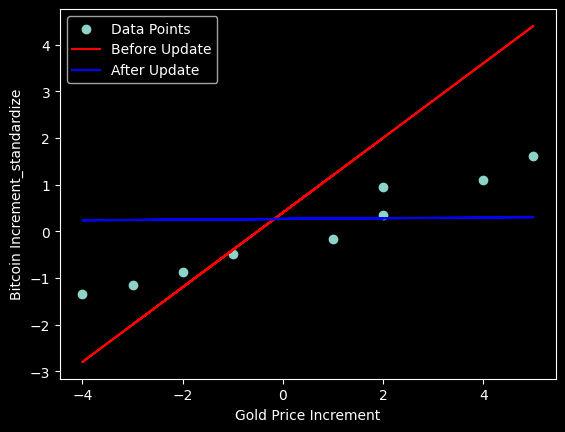

</details>


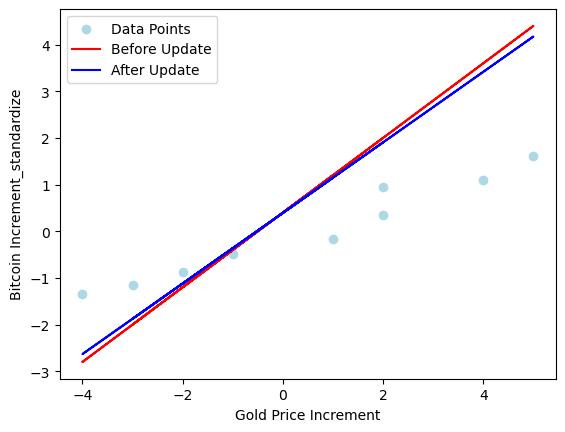

In [18]:
### START CODE HERE ###
theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01

y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']
#Gradient Descent

h_before = theta_0 + theta_1 * x
grad_J_theta_1 = (1/len(y)) * np.sum((h_before - y) * x)
grad_J_theta_0 = (1/len(y)) * np.sum(h_before - y)
theta_1 = theta_1 - alpha * grad_J_theta_1
theta_0 = theta_0 - alpha * grad_J_theta_0
h_after = theta_0 + theta_1 * x

# Plot the graph that shows the model before and after the update parameters
plt.scatter(x, y, color='lightblue', label='Data Points')
plt.plot(x, h_before, color='red', label='Before Update')
plt.plot(x, h_after, color='blue', label='After Update')

plt.xlabel('Gold Price Increment')
plt.ylabel('Bitcoin Increment_standardize')
plt.legend()
plt.show()


### END CODE HERE ###

Now let's create N iterations of gradient descent, <span style='color: orange;'>**_print all parameters and loss every iteration_**</span> then <span style='color: orange;'>**_plot the loss history_**</span> and <span style='color: orange;'>**_save the animation to show the change of model in each iteration to .gif_**</span>.

Let's $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 \in [0,1], \theta_1 \in [0,1], learning\ rate = alpha$


In [19]:
### START CODE HERE ###
def gradient_descent(x, y, theta_0, theta_1, alpha, num_iters):
    m = len(y)
    J_theta = []
    theta_0_history = [theta_0]
    theta_1_history = [theta_1]
    for i in range(num_iters):
        h_before = theta_0_history[i] + theta_1_history[i] * x
        grad_J_theta_1 = (1/m) * np.sum((h_before - y) * x)
        grad_J_theta_0 = (1/m) * np.sum(h_before - y)
        theta_1 = theta_1_history[i] - alpha * grad_J_theta_1
        theta_0 = theta_0_history[i] - alpha * grad_J_theta_0
        theta_0_history.append(theta_0)
        theta_1_history.append(theta_1)
        J_theta.append((1/(2*m)) * np.sum(np.square(h_before - y)))
    return theta_0_history, theta_1_history, J_theta
       

### END CODE HERE ###

In [20]:
### START CODE HERE ###
theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01

y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']



# use  gradient_descent() here to estimate theta_0, theta_1 @all iterations
theta_0_history, theta_1_history, cost_history = gradient_descent(x, y, theta_0, theta_1, alpha, 30)



### END CODE HERE ###

### Show Figure of scatter plot of data and regression model (Red line) at each iteration

Try figure animation using FuncAnimation()\*\*

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![SegmentLocal](parameter_update_animation.gif "segment")

</details>


MovieWriter imagemagick unavailable; using Pillow instead.


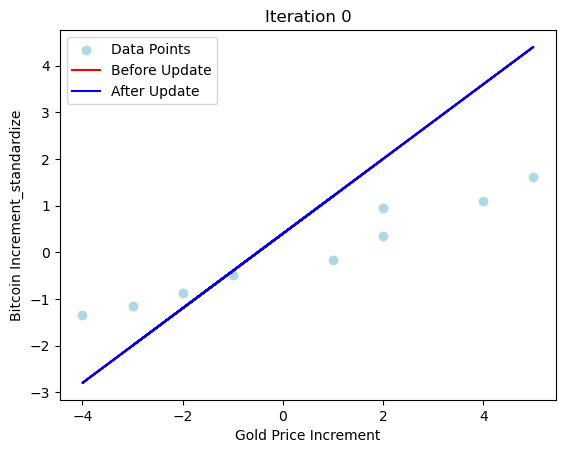

In [21]:
### START CODE HERE ###
def update_plot(i):
    plt.cla()
    h_before = theta_0_history[0] + theta_1_history[0] * x
    plt.scatter(x, y, color='lightblue', label='Data Points')
    plt.plot(x, h_before, color='red', label='Before Update')
    plt.xlabel('Gold Price Increment')
    plt.ylabel('Bitcoin Increment_standardize')
    h_after = theta_0_history[i] + theta_1_history[i] * x
    plt.plot(x, h_after, color='blue', label='After Update')
    plt.title('Iteration {}'.format(i))
    plt.legend()
fig = plt.figure()
ani = FuncAnimation(fig, 
                    update_plot, 
                    frames=np.arange(0, len(theta_0_history), 1), 
                    interval=20)

ani.save('animation.gif', writer='imagemagick', fps=1)





### END CODE HERE ###

In [22]:
#show gif file

display(Image(url='animation.gif'))

### Create the `Predicted_standardize` columns from the best parameters set

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
  <br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize |
| -------------------- | ----------------- | ----------------------------- | --------------------- |
| -1                   | 846               | -0.493265                     | -0.169845             |
| -4                   | 424               | -1.351452                     | -1.063912             |
| 2                    | 1560              | 0.958738                      | 0.724223              |
| -3                   | 523               | -1.150124                     | -0.765890             |

</details>


In [23]:
### START CODE HERE ###
df['Predicted_standardize'] = theta_0_history[-1] + theta_1_history[-1] * df['Gold Price Increment']


### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize,Predicted_standardize
0,1,-1,846,-0.493265,-0.099089
1,2,-4,424,-1.351452,-1.120637
2,3,2,1560,0.958738,0.922459
3,4,-3,523,-1.150124,-0.780121
4,5,1,1012,-0.155685,0.581943
5,6,-2,663,-0.865418,-0.439605
6,7,4,1624,1.088890,1.603491
7,8,5,1882,1.613563,1.944007
8,9,2,1263,0.354753,0.922459


Create the `Predicted` that inverse standardize of `Predicted_standardize`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
  <br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize | Predicted   |
| -------------------- | ----------------- | ----------------------------- | --------------------- | ----------- | ----------- |
| -1                   | 846               | -0.493265                     | -0.239102             | 970.981043  | 1005.037081 |
| -4                   | 424               | -1.351452                     | -1.148680             | 523.710247  |
| 2                    | 1560              | 0.958738                      | 0.670476              | 1418.251840 |
| -3                   | 523               | -1.150124                     | -0.845487             | 672.800513  |

</details>


In [24]:
### START CODE HERE ###
#predicted
df['Predicted'] = standardize_scaler.inverse_transform(df[['Predicted_standardize']])



### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize,Predicted_standardize,Predicted
0,1,-1,846,-0.493265,-0.099089,1039.830015
1,2,-4,424,-1.351452,-1.120637,537.499712
2,3,2,1560,0.958738,0.922459,1542.160318
3,4,-3,523,-1.150124,-0.780121,704.943147
4,5,1,1012,-0.155685,0.581943,1374.716884
5,6,-2,663,-0.865418,-0.439605,872.386581
6,7,4,1624,1.088890,1.603491,1877.047187
7,8,5,1882,1.613563,1.944007,2044.490622
8,9,2,1263,0.354753,0.922459,1542.160318


## Question

1. What would be the iteration that gives the best parameters?
2. What are the best regression model parameters?
3. Show regression model equation of best parameters compared to the regression model equation from the last iteration (#30)


In [25]:
#What would be the iteration that gives the best parameters?
# Ans
best_iteration = np.argmin(cost_history)
print('Best iteration: {}'.format(best_iteration))
#What are the best regression model parameters?
best_regression_model = theta_0_history[best_iteration], theta_1_history[best_iteration]
print('Best regression model parameter: theta_0 = {}, theta_1 = {}'.format(best_regression_model[0], best_regression_model[1]))

#Show regression model equation of best parameters compared to the regression model equation from the last iteration (#30) 
theta_0_best, theta_1_best = theta_0_history[best_iteration], theta_1_history[best_iteration]
theta_0_last, theta_1_last = theta_0_history[30], theta_1_history[30]
print('Best parameters: theta_0 = {}, theta_1 = {}'.format(theta_0_best, theta_1_best))
print('Last parameters: theta_0 = {}, theta_1 = {}'.format(theta_0_last, theta_1_last))






Best iteration: 29
Best regression model parameter: theta_0 = 0.24540653245746835, theta_1 = 0.3432574345820414
Best parameters: theta_0 = 0.24540653245746835, theta_1 = 0.3432574345820414
Last parameters: theta_0 = 0.24142687853475125, theta_1 = 0.34051602718561924
